CSVファイルの複数信号を一度に周波数波形に変換するプログラム

In [1]:
#%%
import numpy as np
from scipy import fftpack
import pandas as pd
import matplotlib.pyplot as plt

#リニア値からdBへ変換
def db(x, dBref):
    y = 20 * np.log10(x / dBref)     #変換式
    return y                         #dB値を返す

# フーリエ変換をする関数
def calc_fft(data, samplerate):
    spectrum = fftpack.fft(data)                                     # 信号のフーリエ変換
    amp = np.sqrt((spectrum.real ** 2) + (spectrum.imag ** 2))       # 振幅成分
    amp = amp / (len(data) / 2)                                      # 振幅成分の正規化（辻褄合わせ）
    phase = np.arctan2(spectrum.imag, spectrum.real)                 # 位相を計算
    phase = np.degrees(phase)                                        # 位相をラジアンから度に変換
    freq = np.linspace(0, samplerate, len(data))                     # 周波数軸を作成
    return spectrum, amp, phase, freq

# csvから列方向に順次フーリエ変換を行い保存する関数
def csv_fft(in_file, out_file):
    df = pd.read_csv(in_file, encoding='SHIFT-JIS')                  # ファイル読み込み
    dt = df.T.iloc[0,1]                                              # 時間刻み



    # データフレームを初期化
    df_amp = pd.DataFrame()
    df_phase = pd.DataFrame()
    df_fft = pd.DataFrame()

    # 列方向に順次フーリエ変換（DFT）をするコード
    for i in range(len(df.T)-1):
        data = df.T.iloc[i+1]                                        # フーリエ変換するデータ列を抽出
        spectrum, amp, phase, freq = calc_fft(data.values, 1/dt)     # フーリエ変換をする関数を実行
        df_amp[df.columns[i+1] + '_amp'] = pd.Series(amp)            # 列名と共にデータフレームに振幅計算結果を追加
        df_phase[df.columns[i+1] + '_phase[deg]'] = pd.Series(phase) # 列名と共にデータフレームに位相計算結果を追加

    df_fft['freq[Hz]'] = pd.Series(freq)                             # 周波数軸を作成
    df_fft = df_fft.join(df_amp).join(df_phase)                      # 周波数・振幅・位相のデータフレームを結合
    df_fft = df_fft.iloc[range(int(len(df)/2)),:]                    # ナイキスト周波数でデータを切り捨て
    df_fft.to_csv(out_file)                                          # フーリエ変換の結果をcsvに保存

    return df, df_fft

# 関数を実行してcsvファイルをフーリエ変換するだけの関数を実行
df, df_fft = csv_fft(in_file='signals_rev2.csv', out_file='fft.csv')

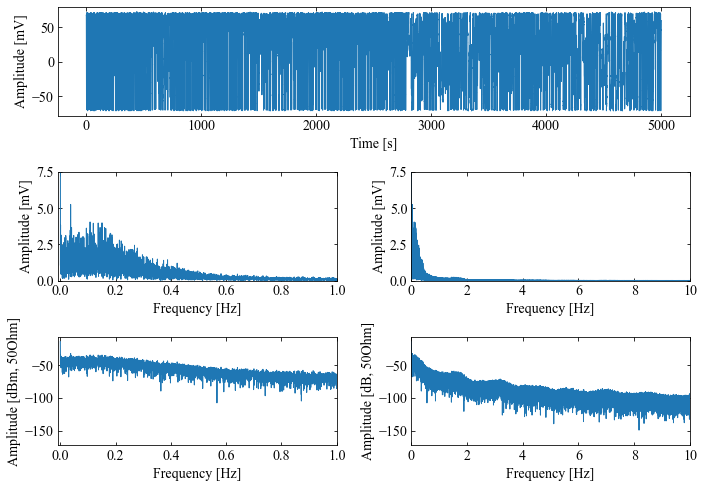

In [2]:
# ここからグラフ描画-------------------------------------
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

# 目盛を内側にする。
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# グラフの上下左右に目盛線を付ける。
fig = plt.figure(figsize=(10, 7))
ax1 = fig.add_subplot(311)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax2 = fig.add_subplot(323)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax3 = fig.add_subplot(324)
ax3.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')
ax4 = fig.add_subplot(325)
ax4.yaxis.set_ticks_position('both')
ax4.xaxis.set_ticks_position('both')
ax5 = fig.add_subplot(326)
ax5.yaxis.set_ticks_position('both')
ax5.xaxis.set_ticks_position('both')
# 軸のラベルを設定する。
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude [mV]')
ax2.set_xlabel('Frequency [Hz]')
# ax2.set_ylabel('Phase [deg]')
ax2.set_ylabel('Amplitude [mV]')
ax3.set_xlabel('Frequency [Hz]')
ax3.set_ylabel('Amplitude [mV]')
ax4.set_xlabel('Frequency [Hz]')
ax4.set_ylabel('Amplitude [dBm, 50Ohm]')
ax5.set_xlabel('Frequency [Hz]')
ax5.set_ylabel('Amplitude [dB, 50Ohm]')


# スケールの設定をする。
# ax2.set_yticks(np.arange(-180, 181, 90))
# ax2.set_xlim(-0.01,1)
# ax2.set_ylim(-180, 180)
ax2.set_xlim(-0.01,1)
ax2.set_ylim(0, 7.5)
ax3.set_xlim(-0.01,10)
ax3.set_ylim(0,7.5)
ax4.set_xlim(-0.01,1)
ax5.set_xlim(-0.01,10)
# ax3.set_yscale('log')

# データプロットの準備とともに、ラベルと線の太さ、凡例の設置を行う。
size = len(df.T)-1
for i in range(size):
    ax1.plot(df.T.iloc[0], df.T.iloc[i+1], label=df.columns[i+1], lw=1)
    # ax2.plot(df_fft.T.iloc[0], df_fft.T.iloc[i+size], label=df_fft.columns[i+size], lw=1)
    ax2.plot(df_fft.T.iloc[0], df_fft.T.iloc[i+1], label=df_fft.columns[i+1], lw=1)
    ax3.plot(df_fft.T.iloc[0], df_fft.T.iloc[i+1], label=df_fft.columns[i+1], lw=1)
    ax4.plot(df_fft.T.iloc[0], db(df_fft.T.iloc[i+1]*1e-3,0.224), label=df_fft.columns[i+1], lw=1)
    ax5.plot(df_fft.T.iloc[0], db(df_fft.T.iloc[i+1]*1e-3,0.224), label=df_fft.columns[i+1], lw=1)
# ax1.legend()
#ax2.legend()
# ax3.legend()

# レイアウト設定
fig.tight_layout()

# グラフを表示する。
plt.show()
plt.close()